In [9]:
import time
import math

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix


from kohenen_map import KohonenNetwork 
from kohonen_layer_topologies import Topology



Read and visualize the data

In [10]:
df = pd.read_csv('iris.csv').drop("Id", axis=1)
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


<Figure size 1000x600 with 0 Axes>

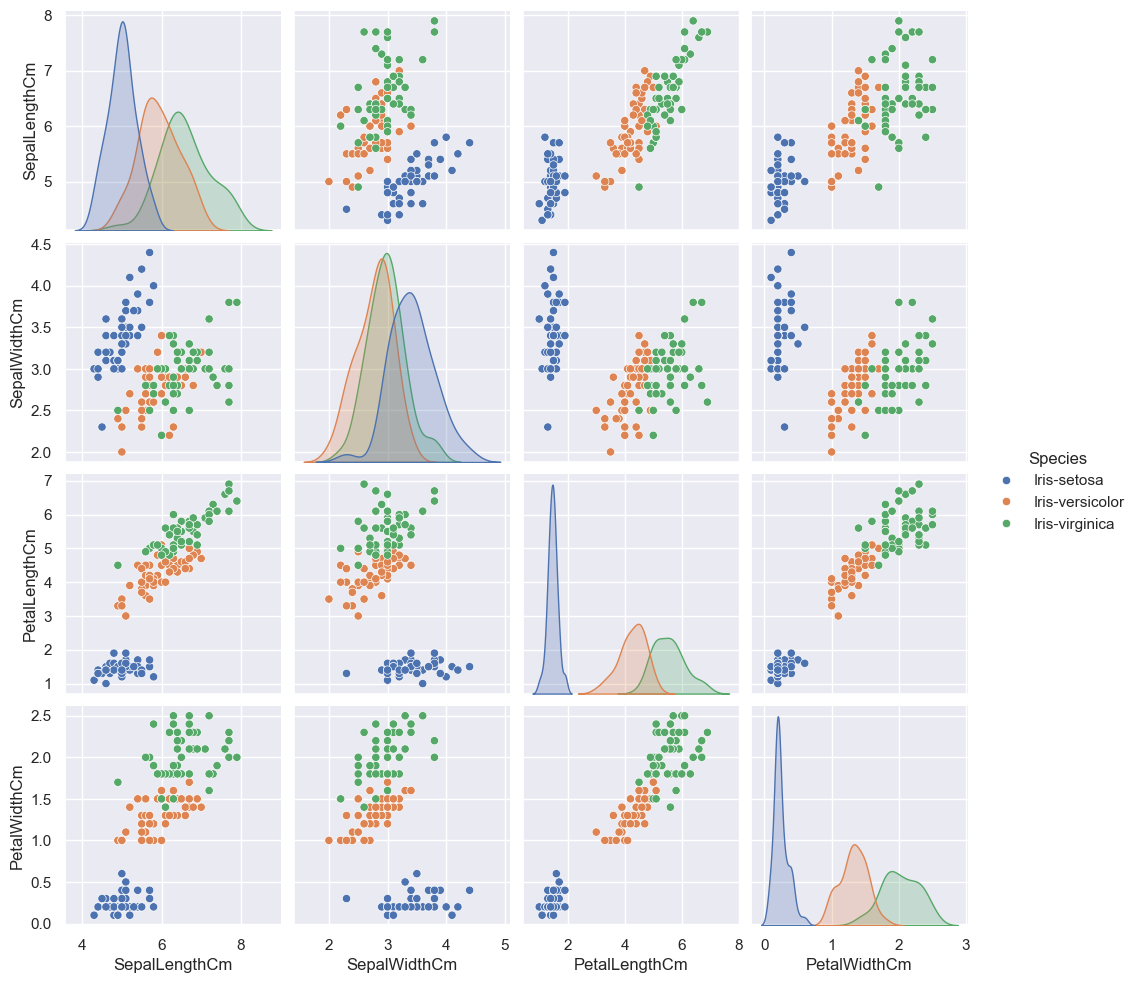

In [11]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.pairplot(data=df, hue="Species")

Create unstructured data by removing the labels and normalize the data, because Kohonen Network needs normalized data

In [12]:
features = df.drop("Species", axis=1)
normalized_input_patterns = ((features - features.min()) / (features.max() - features.min())).values

Create function that maps the created cluster to actual labels

In [13]:
def map_cluster_to_species(predicted_df):
    unique_clusters = predicted_df["Cluster"].unique()
    clusters_to_label = {}
    
    for cluster in unique_clusters:
        clusters_to_label[cluster] = []
        
    for cluster, species in zip(predicted_df["Cluster"], df["Species"]):
        clusters_to_label[cluster].append(species)
        
    map_clusters = {}
    
    for cluster in clusters_to_label:
        counter = Counter(clusters_to_label[cluster])
            
        map_clusters[cluster] = counter.most_common(1)[0][0]
        
    return map_clusters

In [14]:
def measure_prediction_accuracy(kohonen):
    predicted_labels = kohonen.predict_labels(normalized_input_patterns)
    predicted_df = features.copy(True)
    predicted_df["Cluster"] = predicted_labels
    cluster_to_species_map = map_cluster_to_species(predicted_df)
    for i in range(len(predicted_df)):
        predicted_df.at[i, "Species"] = cluster_to_species_map[predicted_df.at[i, "Cluster"]]
    return accuracy_score(df['Species'], predicted_df["Species"])


Global value of number of repeats for each parameter value during an experiment

In [15]:
number_of_repeats = 10

Test the learning rates for the network

In [16]:
learning_rates = np.arange(0.00001, 0.1, 0.00005)

num_of_epochs = 100
lr_decay = 0.99

accuracies_lr = [0] * len(learning_rates)

for _ in range(number_of_repeats):
    counter = 0
    for lr in learning_rates:

        kohonen = KohonenNetwork(4, 100, (10,10), Topology.HEXAGONAL)

        start_time = time.time()

        kohonen.train_network(normalized_input_patterns, lr, 4, num_of_epochs, lr_decay)

        end_time = time.time()

        acc = measure_prediction_accuracy(kohonen)
        accuracies_lr[counter] += acc
        print(f"Learning rate: {lr}, accuracy: {acc}, time: {end_time - start_time}")
        counter += 1

for i in range(len(accuracies_lr)):
    accuracies_lr[i] = accuracies_lr[i]/number_of_repeats


Learning rate: 1e-05, accuracy: 0.66, time: 1.7449135780334473
Learning rate: 6e-05, accuracy: 0.74, time: 1.7006230354309082


KeyboardInterrupt: 

Visualize the results

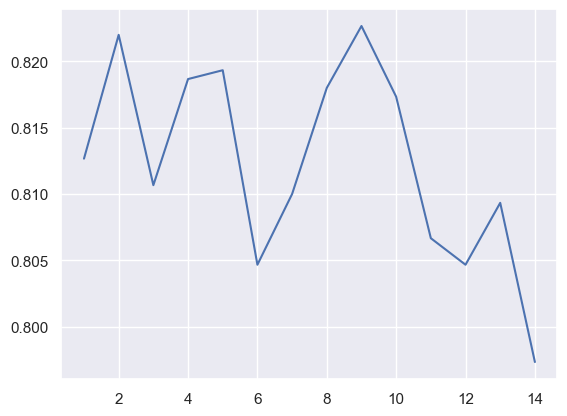

In [49]:
plt.plot(learning_rates, accuracies_lr)

Based on the results I will go with the learning rate of 0.0005

Test the number of neurodes in the kohonen layer (assume square shape for simplicity)

In [16]:
num_of_epochs = 250
lr_decay = 0.99
number_of_neurodes = np.arange(2, 25, 1)

accuracies_n = [0] * len(number_of_neurodes)

for _ in range(number_of_repeats):
    counter = 0
    for n in number_of_neurodes:

        kohonen = KohonenNetwork(4, n**2, (n,n), Topology.HEXAGONAL)
        start_time = time.time()

        kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(n * 0.8), num_of_epochs, lr_decay)

        end_time = time.time()
        acc = measure_prediction_accuracy(kohonen)
        accuracies_n[counter] += acc
        print(f"Number of neurones: {n}, accuracy: {acc}, time: {end_time - start_time}")
        counter += 1

for i in range(len(accuracies_n)):
    accuracies_n[i] = accuracies_n[i]/number_of_repeats

Number of epochs - 10, accuracy: 0.7733333333333333, time: 1.011018991470337
Number of epochs - 30, accuracy: 0.8066666666666666, time: 3.0369985103607178
Number of epochs - 50, accuracy: 0.82, time: 5.0209996700286865
Number of epochs - 70, accuracy: 0.8266666666666667, time: 7.089964389801025
Number of epochs - 90, accuracy: 0.82, time: 9.078001260757446
Number of epochs - 110, accuracy: 0.82, time: 11.064006567001343
Number of epochs - 130, accuracy: 0.84, time: 13.058308362960815
Number of epochs - 150, accuracy: 0.84, time: 15.14499568939209
Number of epochs - 170, accuracy: 0.82, time: 16.979001998901367
Number of epochs - 190, accuracy: 0.8666666666666667, time: 19.105971336364746
Number of epochs - 210, accuracy: 0.8466666666666667, time: 21.072057247161865
Number of epochs - 230, accuracy: 0.82, time: 23.24299454689026
Number of epochs - 250, accuracy: 0.82, time: 25.123302459716797
Number of epochs - 270, accuracy: 0.8066666666666666, time: 27.120999097824097
Number of epochs

Plot the results

In [20]:
plt.plot(number_of_neurodes, accuracies_n)


Neighbourhood decaay: True, accuracy: 0.78, time: 7.3130271434783936
Neighbourhood decaay: False, accuracy: 0.7733333333333333, time: 7.109966516494751
Neighbourhood decaay: True, accuracy: 0.82, time: 7.234032869338989
Neighbourhood decaay: False, accuracy: 0.7666666666666667, time: 7.11030387878418
Neighbourhood decaay: True, accuracy: 0.7733333333333333, time: 7.058031320571899
Neighbourhood decaay: False, accuracy: 0.8, time: 7.070966482162476
Neighbourhood decaay: True, accuracy: 0.7733333333333333, time: 6.9070281982421875
Neighbourhood decaay: False, accuracy: 0.72, time: 7.098001003265381
Neighbourhood decaay: True, accuracy: 0.7866666666666666, time: 7.234000205993652
Neighbourhood decaay: False, accuracy: 0.7266666666666667, time: 7.003997325897217
Neighbourhood decaay: True, accuracy: 0.8, time: 7.172998905181885
Neighbourhood decaay: False, accuracy: 0.7666666666666667, time: 7.187021970748901
Neighbourhood decaay: True, accuracy: 0.7466666666666667, time: 7.140031576156616

Test the neighbourhood size (neighbourhood is given in percentage)

In [40]:
num_of_epochs = 250
lr_decay = 0.99

neurodes_number = 225
shape = (15, 15)


neighbourhood_range = np.arange(0, 1, 0.05)

accuracies_neighbourhood = [0] * len(neighbourhood_range)

for _ in range(0, 10):
    i = 0
    for n in neighbourhood_range:

        kohonen = KohonenNetwork(4, neurodes_number, shape, Topology.HEXAGONAL)
        start_time = time.time()

        kohonen.train_network(normalized_input_patterns, 0.0005, round(n*shape[0]), num_of_epochs, lr_decay)

        end_time = time.time()

        acc = measure_prediction_accuracy(kohonen)
        accuracies_n[i] += acc
        print(f"Number of neighbours: {n}, accuracy: {acc}, time: {end_time - start_time}")
        i += 1

for i in range(len(accuracies_n)):
    accuracies_n[i] = accuracies_n[i]/10

0.8099999999999998


visualize results

In [63]:
plt.plot(neighbourhood_range, accuracies_n)

Neighbourhood decaay: (1, 150), accuracy: 0.8333333333333334, time: 16.4346661567688
Neighbourhood decaay: (3, 50), accuracy: 0.7933333333333333, time: 11.975003004074097
Neighbourhood decaay: (5, 30), accuracy: 0.8266666666666667, time: 10.957969903945923
Neighbourhood decaay: (6, 25), accuracy: 0.8, time: 11.551996231079102
Neighbourhood decaay: (10, 15), accuracy: 0.7933333333333333, time: 10.739558458328247
Neighbourhood decaay: (15, 10), accuracy: 0.82, time: 11.4069983959198
Neighbourhood decaay: (25, 6), accuracy: 0.74, time: 10.88200044631958
Neighbourhood decaay: (30, 5), accuracy: 0.7733333333333333, time: 10.448970794677734
Neighbourhood decaay: (50, 3), accuracy: 0.7933333333333333, time: 10.793029546737671
Neighbourhood decaay: (150, 1), accuracy: 0.7933333333333333, time: 10.373969078063965
Neighbourhood decaay: (1, 150), accuracy: 0.7933333333333333, time: 12.171000003814697
Neighbourhood decaay: (3, 50), accuracy: 0.7866666666666666, time: 10.98306918144226
Neighbourhoo

KeyboardInterrupt: 

Test the number of epochs

In [ ]:
lr_decay = 0.99

neurodes_number = 400
shape = (20, 20)

number_of_epochs = np.arange(10, 300, 20)

accuracies_n = [0] * len(number_of_epochs)

for _ in range(0, 10):
    counter = 0

    for n in number_of_epochs:

        kohonen = KohonenNetwork(4, neurodes_number,shape, Topology.HEXAGONAL)

        start_time = time.time()

        kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(neurodes_number/0.8), n, lr_decay)

        end_time = time.time()

        acc = measure_prediction_accuracy(kohonen)
        accuracies_n[counter] += acc
        print(f"Number of epochs - {n}, accuracy: {acc}, time: {end_time - start_time}")
        counter += 1

for i in range(len(accuracies_n)):
    accuracies_n[i] = accuracies_n[i]/10

Visualize the results

In [8]:
plt.plot(number_of_epochs, accuracies_n)

48
2.08 % done
4.17 % done
6.25 % done
8.33 % done
10.42 % done
12.5 % done
14.580000000000002 % done
16.669999999999998 % done
18.75 % done
20.830000000000002 % done
22.919999999999998 % done
25.0 % done
27.08 % done
29.17 % done
31.25 % done
33.33 % done
35.42 % done
37.5 % done
39.58 % done
41.67 % done
43.75 % done
45.83 % done
47.92 % done
50.0 % done
52.080000000000005 % done
54.169999999999995 % done
56.25 % done
58.330000000000005 % done
60.419999999999995 % done
62.5 % done
64.58 % done
66.67 % done
68.75 % done
70.83 % done
72.92 % done
75.0 % done
77.08 % done
79.17 % done
81.25 % done
83.33 % done
85.42 % done
87.5 % done
89.58 % done
91.67 % done
93.75 % done
95.83 % done
97.92 % done
100.0 % done


Test different topologies

In [ ]:
num_of_epochs = 250
lr_decay = 0.99

neurodes_number = 144
shape = (12, 12)

topologies = [Topology.HEXAGONAL, Topology.RECTANGLE, Topology.LINEAR]
accuracies_n = [0] * len(topologies)
time_to_train = [0] * len(topologies)
for _ in range(number_of_repeats):
    counter = 0

    for n in topologies:

        kohonen = KohonenNetwork(4, neurodes_number,shape, n)
        start_time = time.time()

        kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(neurodes_number*0.8), num_of_epochs, lr_decay, True)

        end_time = time.time()

        acc = measure_prediction_accuracy(kohonen)

        accuracies_n[counter] += acc
        time_to_train[counter] += end_time - start_time
        print(f"Topology {n}, accuracy: {acc}, time: {end_time - start_time}")
        counter += 1

for i in range(len(accuracies_n)):
    accuracies_n[i] = accuracies_n[i]/number_of_repeats
    time_to_train[i] = time_to_train[i]/number_of_repeats

Print out the results

In [ ]:
for i in range(len(time_to_train)):
    print(f"Topology {topologies[i]}, time to train {time_to_train[i]}, average accuracy: {accuracies_n[i]}")

Test how the neighbourhood decay influences the accuracy of the network

In [ ]:
accuracies_n = [0,0]
for _ in range(number_of_repeats):
    counter = 0
    for n in [True, False]:

        kohonen = KohonenNetwork(4, 100, (10,10), Topology.HEXAGONAL)
        start_time = time.time()

        kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(neurodes_number*0.8), 250, 0.99, neighbourhood_decay=n)

        end_time = time.time()

        acc = measure_prediction_accuracy(kohonen)
        accuracies_n[i] += acc
        print(f"Neighbourhood decaay: {n}, accuracy: {acc}, time: {end_time - start_time}")
        counter += 1

for i in range(len(accuracies_n)):
    accuracies_n[i] = accuracies_n[i]/number_of_repeats

Print out the results

In [ ]:
print(f"For True accuracy is {accuracies_n[0]}")
print(f"For False accuracy is {accuracies_n[1]}")

In [ ]:
kohonen = KohonenNetwork(4,225,(15,15),Topology.HEXAGONAL)
kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(225*0.8), 250, 0.99, True)
predicted_labels = kohonen.predict_labels(normalized_input_patterns)
predicted_df = features.copy(True)
predicted_df["Cluster"] = predicted_labels
sns.pairplot(predicted_df, hue="Cluster")


In [ ]:
#merge clusters
map_clusters = map_cluster_to_species(predicted_df)

for i in range(len(predicted_df)):
    predicted_df.at[i, "Species"] = map_clusters[predicted_df.at[i, "Cluster"]]

predicted_df.drop(["Cluster"], axis=1, inplace=True)
custom_order = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
predicted_df["SortOrder"] = predicted_df["Species"].map(custom_order)
predicted_df.sort_values("SortOrder")
predicted_df.drop(["SortOrder"], axis=1, inplace=True)
sns.pairplot(predicted_df, hue="Species")


In [ ]:
accuracy = accuracy_score(df["Species"], predicted_df["Species"])
confusion_matrix = confusion_matrix(df["Species"], predicted_df["Species"])

print(accuracy)
print(confusion_matrix)

Grid search using multiple threads

In [17]:
import concurrent
from concurrent.futures import ThreadPoolExecutor
from itertools import product

learning_rates = [0.0005, 0.001, 0.005]
shapes = [(1,100), (2,50), (4, 25), (25, 4), (50, 2), (100, 1)]
neighbourhoods = [0.3, 0.4]
topologies = [Topology.LINEAR, Topology.RECTANGLE]
lr_decays = [0.99]
neighbourhood_decay = [True]
epochs = [150]

parameters_combination = list(product(learning_rates, shapes, neighbourhoods, topologies, lr_decays, neighbourhood_decay, epochs))

number_of_parameters = len(parameters_combination)
number_of_repeats = 10
print(number_of_parameters)
results = {}

def train_by_grid(parameters):
    learning_rate, shape, neighbourhood, topology, lr_decay, neighbour_decay, epochs_number = parameters

    neighbourhood_range =  math.ceil(neighbourhood * min(shape))
    total_acc = 0
    total_time = 0
    for _ in range(number_of_repeats):
        kohonen_layer_size = shape[0] * shape[1]
        kohonen = KohonenNetwork(4, kohonen_layer_size, shape, topology)
        start_time = time.time()
        kohonen.train_network(normalized_input_patterns, learning_rate,neighbourhood_range, epochs_number, lr_decay, neighbour_decay)

        end_time = time.time()
        predicted_labels = kohonen.predict_labels(normalized_input_patterns)
        predicted_df = features.copy(True)
        predicted_df["Cluster"] = predicted_labels
        cluster_to_species_map = map_cluster_to_species(predicted_df)
        for j in range(len(predicted_df)):
            predicted_df.at[j, "Species"] = cluster_to_species_map[predicted_df.at[j, "Cluster"]]
        total_acc += accuracy_score(df['Species'], predicted_df["Species"])
        total_time += (end_time - start_time)

    return parameters, (total_acc/number_of_repeats), (total_time/number_of_repeats)


with ThreadPoolExecutor(max_workers=8) as executor:
    total_counter = 0
    futures = [executor.submit(train_by_grid, params) for params in parameters_combination]
    for future in concurrent.futures.as_completed(futures):
        total_counter += 1
        print(round(total_counter/number_of_parameters, 4) * 100, "% done")
        params, acc, total_time = future.result()
        results[params] = [acc, total_time]

324
0.31 % done
0.62 % done
0.9299999999999999 % done
1.23 % done
1.54 % done
1.8499999999999999 % done
2.16 % done
2.4699999999999998 % done
2.78 % done
3.09 % done
3.4000000000000004 % done
3.6999999999999997 % done
4.01 % done
4.32 % done
4.63 % done
4.9399999999999995 % done
5.25 % done
5.56 % done
5.86 % done
6.17 % done
6.4799999999999995 % done
6.79 % done
7.1 % done
7.41 % done
7.720000000000001 % done
8.02 % done
8.33 % done
8.64 % done
8.95 % done
9.26 % done
9.569999999999999 % done
9.879999999999999 % done
10.190000000000001 % done
10.489999999999998 % done
10.8 % done
11.110000000000001 % done
11.42 % done
11.73 % done
12.04 % done
12.35 % done
12.65 % done
12.959999999999999 % done
13.270000000000001 % done
13.58 % done
13.889999999999999 % done
14.2 % done
14.510000000000002 % done
14.81 % done
15.120000000000001 % done
15.43 % done
15.740000000000002 % done
16.05 % done
16.36 % done
16.669999999999998 % done
16.98 % done
17.28 % done
17.59 % done
17.9 % done
18.21 % don

Print out the results

In [18]:
grid_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy", "TotalTime"])
sorted_grid_df = grid_df.sort_values(by="Accuracy", ascending=False)
sorted_grid_df.head(20)

,Accuracy,TotalTime
"(0.001, (1, 100), 0.3, Topology.LINEAR, 0.99, True, 100)",0.816667,6.545742
"(0.001, (1, 100), 0.8, Topology.RECTANGLE, 0.99, True, 100)",0.816000,7.385609
"(0.001, (1, 100), 0.6, Topology.LINEAR, 0.99, True, 100)",0.814667,11.267057
"(0.001, (4, 25), 0.6, Topology.LINEAR, 0.99, True, 100)",0.814667,8.307111
"(0.001, (1, 100), 0.3, Topology.HEXAGONAL, 0.99, True, 100)",0.814667,11.452653
"(0.001, (50, 2), 0.7, Topology.RECTANGLE, 0.99, True, 100)",0.813333,7.921397
"(0.001, (1, 100), 0.7, Topology.RECTANGLE, 0.99, True, 100)",0.812667,6.988285
"(0.001, (1, 100), 0.5, Topology.LINEAR, 0.99, True, 100)",0.812667,7.675584
"(0.001, (100, 1), 0.7, Topology.LINEAR, 0.99, True, 100)",0.812000,8.331335
"(0.001, (100, 1), 0.6, Topology.LINEAR, 0.99, True, 100)",0.812000,7.768670


Wniosek - jeżeli linearna topologia to wtedy mały neigbhourhood = 1